In [130]:
# import matplotlib dependencies and styles
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

# import general dependencies to be used
import numpy as np
import pandas as pd
from datetime import datetime
from dateutil.relativedelta import relativedelta

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, desc

# Reflect Tables into SQLAlchemy ORM

In [4]:
# create engine to hawaii.sqlite
database_path = "Resources/hawaii.sqlite"
engine = create_engine(f"sqlite:///{database_path}")

In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# create session from Python to the database
session = Session(engine)

In [166]:
# look at columns for Measurement
first_row_measurement = session.query(Measurement).first()
first_row_measurement.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x1c6e956b220>,
 'tobs': 65.0,
 'prcp': 0.08,
 'id': 1,
 'station': 'USC00519397',
 'date': '2010-01-01'}

In [10]:
# look at columns for Station
first_row_station = session.query(Station).first()
first_row_station.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x1c6e59ce460>,
 'longitude': -157.8168,
 'name': 'WAIKIKI 717.2, HI US',
 'id': 1,
 'elevation': 3.0,
 'latitude': 21.2716,
 'station': 'USC00519397'}

# Exploratory Precipitation Analysis

In [11]:
# find the most recent date in the data set
recent_date_str = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
recent_date_str = recent_date_str[0]
recent_date_str

'2017-08-23'

In [12]:
### Design a query to retrieve the last 12 months of precipitation data and plot the results. 
### Starting from the most recent data point in the database. 

# calculate the date one year from the last date in data set
recent_date = datetime.strptime(recent_date_str, '%Y-%m-%d').date()
year_prior = recent_date - relativedelta(years=1)
year_prior_string = year_prior.strftime("%Y-%m-%d")

In [137]:
# perform a query to retrieve the date and max precipitation for each date over time range
year_data = session.query(func.max(Measurement.prcp), Measurement.date).\
    filter(Measurement.date>=year_prior_string).\
    group_by(Measurement.date).all()
year_data

[(1.79, '2016-08-23'),
 (2.28, '2016-08-24'),
 (0.21, '2016-08-25'),
 (0.04, '2016-08-26'),
 (0.18, '2016-08-27'),
 (2.07, '2016-08-28'),
 (0.9, '2016-08-29'),
 (0.05, '2016-08-30'),
 (2.46, '2016-08-31'),
 (0.02, '2016-09-01'),
 (0.19, '2016-09-02'),
 (1.0, '2016-09-03'),
 (0.74, '2016-09-04'),
 (0.18, '2016-09-05'),
 (1.0, '2016-09-06'),
 (1.35, '2016-09-07'),
 (0.22, '2016-09-08'),
 (0.35, '2016-09-09'),
 (1.16, '2016-09-10'),
 (0.6, '2016-09-11'),
 (1.04, '2016-09-12'),
 (1.2, '2016-09-13'),
 (6.7, '2016-09-14'),
 (3.35, '2016-09-15'),
 (0.61, '2016-09-16'),
 (0.36, '2016-09-17'),
 (0.42, '2016-09-18'),
 (0.25, '2016-09-19'),
 (0.43, '2016-09-20'),
 (1.02, '2016-09-21'),
 (0.75, '2016-09-22'),
 (0.94, '2016-09-23'),
 (0.27, '2016-09-24'),
 (0.04, '2016-09-25'),
 (1.02, '2016-09-26'),
 (1.0, '2016-09-27'),
 (0.08, '2016-09-28'),
 (1.49, '2016-09-29'),
 (0.38, '2016-09-30'),
 (1.02, '2016-10-01'),
 (0.61, '2016-10-02'),
 (0.46, '2016-10-03'),
 (3.46, '2016-10-04'),
 (0.81, '2016-10-0

In [140]:
### Save the query results as a Pandas DataFrame and set the index to the date column

# create blank lists
precip = []
date = []

# add query data to lists
for data in year_data:
    precip.append(data[0])
    date.append(data[1])

# create dataframe and sort by date
precipitation = pd.DataFrame({"Precipitation": precip,
                              "Date":date}).sort_values(by="Date")

# convert date column to datetime datatype - uncomment this if you'd like to perform this - will change the plot xaxis ticks
#precipitation["Date"] = pd.to_datetime(precipitation["Date"])

# set date column as the index & drop old date column
precipitation = precipitation.set_index(precipitation["Date"], inplace=False)[["Precipitation"]]

# display head of dataframe
precipitation.head()

,Precipitation
Date,
2016-08-23,1.79
2016-08-24,2.28
2016-08-25,0.21
2016-08-26,0.04
2016-08-27,0.18


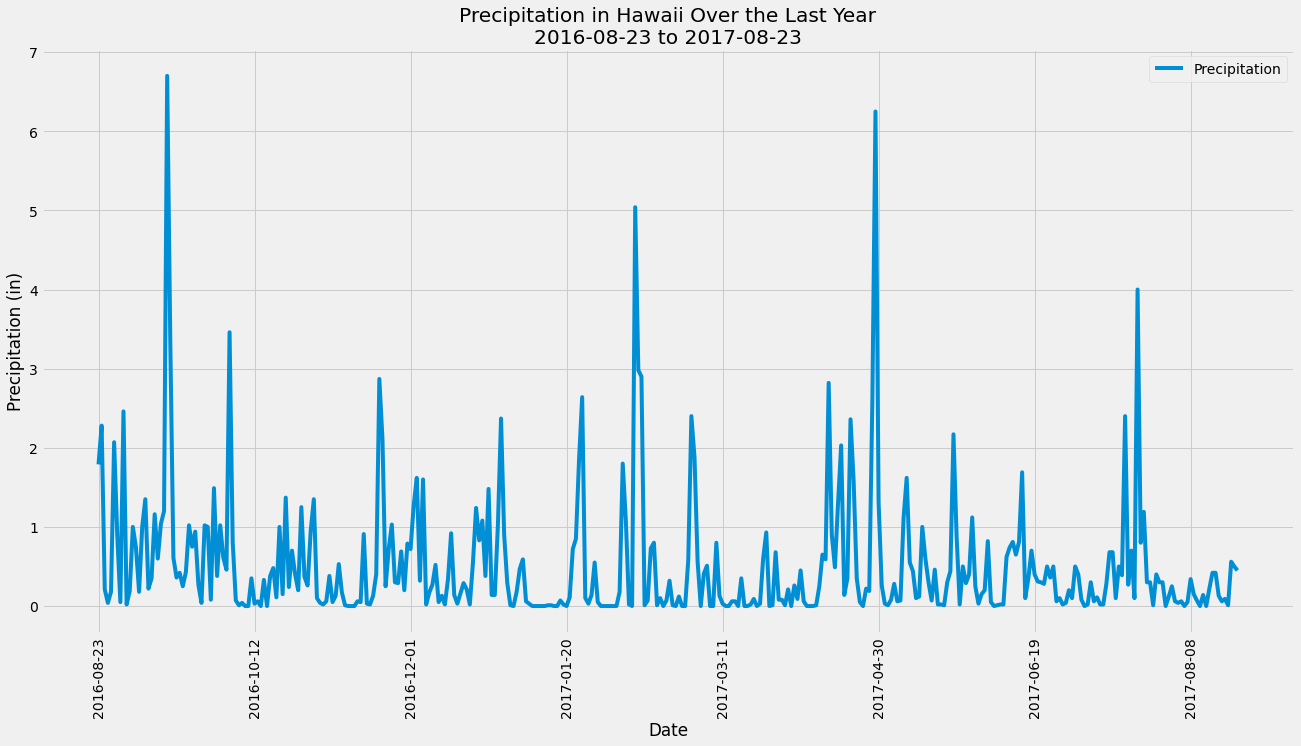

In [146]:
# use pandas plotting with matplotlib to plot the data
precip_plot = precipitation.plot(rot=90, figsize=(20, 10), \
                                 title=f"Precipitation in Hawaii Over the Last Year\n{year_prior} to {recent_date}",\
                                 ylabel="Precipitation (in)")
plt.show()

In [147]:
# use pandas to calcualte the summary statistics for the precipitation data
precipitation.describe()

,Precipitation
count,366.000000
mean,0.520765
std,0.830728
min,0.000000
25%,0.040000
50%,0.250000
75%,0.672500
max,6.700000


# Exploratory Station Analysis

In [63]:
# design a query to calculate the total number stations in the dataset
num_stations = session.query(Measurement.station).distinct().all()

# print results
print(f"Total number of stations in dataset: {len(num_stations)}")

Total number of stations in dataset: 9


In [161]:
# design a query to find the most active stations & list the stations and the counts in descending order
active_stations = session.query(Measurement.station, func.count(Measurement.station), Station.id).filter(Station.station==Measurement.station).group_by(Measurement.station).order_by(desc(func.count(Measurement.station))).all()

# print results
for station in active_stations:
    print(f"Station ID {station[2]} ({station[0]}): {station[1]}")

Station ID 7 (USC00519281): 2772
Station ID 1 (USC00519397): 2724
Station ID 2 (USC00513117): 2709
Station ID 6 (USC00519523): 2669
Station ID 9 (USC00516128): 2612
Station ID 3 (USC00514830): 2202
Station ID 8 (USC00511918): 1979
Station ID 4 (USC00517948): 1372
Station ID 5 (USC00518838): 511


In [170]:
# using the most active station id from the previous query, calculate the lowest, highest, and average temperature
most_active_station = active_stations[0]
most_active_station_stats = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
    filter(Station.station==Measurement.station).\
    filter(Station.id == most_active_station[2]).all()

# print results
print(f"Most Active Station (ID {most_active_station[2]}: {most_active_station[0]}) Stats:\n \
Lowest Temp: {most_active_station_stats[0][0]}\n \
Highest Temp: {most_active_station_stats[0][1]}\n \
Average Temp: {round(most_active_station_stats[0][2],2)}")

Most Active Station (ID 7: USC00519281) Stats:
 Lowest Temp: 54.0
 Highest Temp: 85.0
 Average Temp: 71.66


In [173]:
# using the most active station id, query the last 12 months of temperature observation data for this station and plot the results as a histogram
year_most_active_station = session.query(Measurement.tobs).\
    filter(Station.station==Measurement.station).\
    filter(Station.id == most_active_station[2]).\
    filter(Measurement.date>=year_prior_string).all()

# flatten tuples
flattened_temps = [x[0] for x in year_most_active_station]

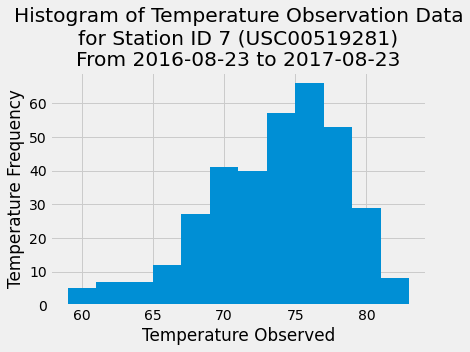

In [174]:
# plot histogram with 12 bins
plt.hist(flattened_temps, bins=12)
plt.title(f"Histogram of Temperature Observation Data\nfor Station ID {most_active_station[2]} ({most_active_station[0]})\nFrom {year_prior} to {recent_date}")
plt.xlabel("Temperature Observed")
plt.ylabel("Temperature Frequency")
plt.show()

# Close session

In [75]:
# close session
session.close()